# Untergrund

In [1]:
dataU = pd.read_csv("252\\UntergrundAgKT.dat", sep="\t", header=None, index_col=0)
# display(dataU)

y0 = dataU.mean().values[0]
dy0 = dataU.std().values[0]/sqrt(49)

display_valerr(to_valerr("y_0",y0,dy0))

<IPython.core.display.Latex object>

# Silber

In [35]:
dataAg = pd.concat([pd.Series(arange(1,41)*10-5, index=range(1,41)),
                    pd.read_csv("252\\Ag1KT.dat", sep="\t", header=None, index_col=0),
                    pd.read_csv("252\\Ag2KT.dat", sep="\t", header=None, index_col=0),
                    pd.read_csv("252\\Ag3KT.dat", sep="\t", header=None, index_col=0),
                    pd.read_csv("252\\Ag4KT.dat", sep="\t", header=None, index_col=0)], axis=1)
dataAg.columns = ["Zerfallszeit $[s]$","Messung 1","Messung 2",
                  "Messung 3","Messung 4"]
dataAg[r"$N$"] = sum(dataAg.iloc[:,1:], axis=1)
dataAg[r"$\Delta N$"] = sqrt(dataAg["$N$"])
display(dataAg.round(2))

,Zerfallszeit $[s]$,Messung 1,Messung 2,Messung 3,Messung 4,$N$,$\Delta N$
1,5,96,120,96,94,406,20.15
2,15,76,68,84,80,308,17.55
3,25,77,56,61,68,262,16.19
4,35,50,54,54,57,215,14.66
5,45,50,38,54,40,182,13.49
6,55,37,47,41,31,156,12.49
7,65,25,27,33,34,119,10.91
8,75,17,23,24,28,92,9.59
9,85,21,24,23,23,91,9.54
10,95,24,32,16,20,92,9.59


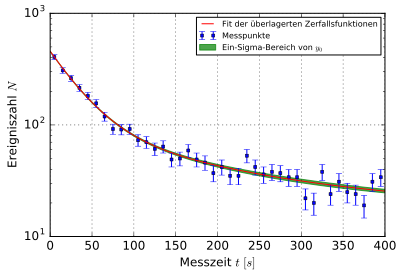

## Ohne $\Delta y_0$

$A_1$,$78.47 \pm 21.79$
$A_2$,$361 \pm 23$
$\lambda_1$,$0.0060 \pm 0.0011$
$\lambda_2$,$0.0295 \pm 0.0035$
$\tau_1$,$167.94 \pm 31.16$
$\tau_2$,$33.93 \pm 3.98$
"$T_{{1/2,1}}$",$116.41 \pm 21.60$
"$T_{{1/2,2}}$",$23.52 \pm 2.76$
$\chi^2$,$34.780$
$\chi^2_{red}$,$0.966$


## $+\Delta y_0$

$A_1$,$76.20 \pm 20.03$
$A_2$,$364 \pm 22$
$\lambda_1$,$0.0056 \pm 0.0010$
$\lambda_2$,$0.0292 \pm 0.0033$
$\tau_1$,$179.38 \pm 33.17$
$\tau_2$,$34.24 \pm 3.85$
"$T_{{1/2,1}}$",$124.33 \pm 22.99$
"$T_{{1/2,2}}$",$23.73 \pm 2.67$
$\chi^2$,$34.731$
$\chi^2_{red}$,$0.965$


## $-\Delta y_0$

$A_1$,$81.37 \pm 23.94$
$A_2$,$357 \pm 24$
$\lambda_1$,$0.0064 \pm 0.0012$
$\lambda_2$,$0.0298 \pm 0.0037$
$\tau_1$,$156.70 \pm 29.23$
$\tau_2$,$33.58 \pm 4.14$
"$T_{{1/2,1}}$",$108.62 \pm 20.26$
"$T_{{1/2,2}}$",$23.27 \pm 2.87$
$\chi^2$,$34.854$
$\chi^2_{red}$,$0.968$


## Lebensdauer und Halbwertszeit mit quadratisch addierten Fehlern

$\tau_1$,$167.94 \pm 31.71$
$\tau_2$,$33.93 \pm 7.06$
"$T_{{1/2,1}}$",$116.41 \pm 21.98$
"$T_{{1/2,2}}$",$23.52 \pm 4.90$


In [26]:
from scipy.optimize import curve_fit

exp2 = []
popt = [0,0,0]
pcov = [0,0,0]
tau = []
dtau = []
chisq = []

for i in range(-1,2):
    exp2.append(lambda t, A1, A2, l1, l2: 4*(y0 + i*dy0) + A1*exp(-l1*t) + A2*exp(-l2*t))
    popt[i+1], pcov[i+1] = curve_fit(exp2[i+1], dataAg.iloc[:,0], dataAg.iloc[:,5],
                                     sigma=dataAg.iloc[:,6].values, p0=(70,400, 3e-3, 2e-2))
    tau.append(1/popt[i+1][2:])
    dtau.append(tau[i+1]*tau[i+1]*sqrt(array([pcov[i+1][2][2],pcov[i+1][3][3]])))
    
    chisq.append(chi2(dataAg.iloc[:,5], exp2[i+1](dataAg.iloc[:,0], *(popt[i+1])), dataAg.iloc[:,6].values))

#     figure()
#     errorbar(dataAg.iloc[:,0], dataAg.iloc[:,5], yerr=dataAg.iloc[:,6].values, fmt='bs')
#     plot(linspace(0,400,1000), exp2[i+1](linspace(0,400,1000), *(popt[i+1])), 'r')
#     grid()
#     show()
    
figure()
errorbar(dataAg.iloc[:,0], dataAg.iloc[:,5], yerr=dataAg.iloc[:,6].values, fmt='bs', label='Messpunkte')
plot(linspace(0,400,1000), exp2[1](linspace(0,400,1000), *(popt[1])), 'r-', label='Fit der überlagerten Zerfallsfunktionen')
fill_between(linspace(0,400,1000), exp2[2](linspace(0,400,1000), *(popt[2])), exp2[0](linspace(0,400,1000), *(popt[0])),
             color='g', alpha=0.7)
grid()
yscale('log')
xlabel('Messzeit $t \ [s]$')
ylabel('Ereigniszahl $N$')
handles, labels = gca().get_legend_handles_labels()
p = Rectangle((0, 0), 1, 1, color='g', alpha=0.7)
handles.append(p)
labels.append('Ein-Sigma-Bereich von $y_0$')
legend(handles, labels, fontsize=8)
show()

display(Markdown("## Ohne $\Delta y_0$"))
display_valtable([
        ("$A_1$", "${0:.2f} \pm {1:.2f}$".format(popt[1][0], sqrt(pcov[1][0][0]))),
        ("$A_2$", "${0:3.0f} \pm {1:2.0f}$".format(popt[1][1], sqrt(pcov[1][1][1]))),
        ("$\lambda_1$", "${0:.4f} \pm {1:.4f}$".format(popt[1][2], sqrt(pcov[1][2][2]))),
        ("$\lambda_2$", "${0:.4f} \pm {1:.4f}$".format(popt[1][3], sqrt(pcov[1][3][3]))),
        (r"$\tau_1$", "${0:.2f} \pm {1:.2f}$".format(tau[1][0], dtau[1][0])),
        (r"$\tau_2$", "${0:.2f} \pm {1:.2f}$".format(tau[1][1], dtau[1][1])),
        (r"$T_{{1/2,1}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1][0], log(2)*dtau[1][0])),
        (r"$T_{{1/2,2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1][1], log(2)*dtau[1][1])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[1])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[1]/36))
    ])

display(Markdown("## $+\Delta y_0$"))
display_valtable([
        ("$A_1$", "${0:.2f} \pm {1:.2f}$".format(popt[0][0], sqrt(pcov[0][0][0]))),
        ("$A_2$", "${0:3.0f} \pm {1:2.0f}$".format(popt[0][1], sqrt(pcov[0][1][1]))),
        ("$\lambda_1$", "${0:.4f} \pm {1:.4f}$".format(popt[0][2], sqrt(pcov[0][2][2]))),
        ("$\lambda_2$", "${0:.4f} \pm {1:.4f}$".format(popt[0][3], sqrt(pcov[0][3][3]))),
        (r"$\tau_1$", "${0:.2f} \pm {1:.2f}$".format(tau[0][0], dtau[0][0])),
        (r"$\tau_2$", "${0:.2f} \pm {1:.2f}$".format(tau[0][1], dtau[0][1])),
        (r"$T_{{1/2,1}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[0][0], log(2)*dtau[0][0])),
        (r"$T_{{1/2,2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[0][1], log(2)*dtau[0][1])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[0])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[0]/36))
    ])

display(Markdown("## $-\Delta y_0$"))
display_valtable([
        ("$A_1$", "${0:.2f} \pm {1:.2f}$".format(popt[2][0], sqrt(pcov[2][0][0]))),
        ("$A_2$", "${0:3.0f} \pm {1:2.0f}$".format(popt[2][1], sqrt(pcov[2][1][1]))),
        ("$\lambda_1$", "${0:.4f} \pm {1:.4f}$".format(popt[2][2], sqrt(pcov[2][2][2]))),
        ("$\lambda_2$", "${0:.4f} \pm {1:.4f}$".format(popt[2][3], sqrt(pcov[2][3][3]))),
        (r"$\tau_1$", "${0:.2f} \pm {1:.2f}$".format(tau[2][0], dtau[2][0])),
        (r"$\tau_2$", "${0:.2f} \pm {1:.2f}$".format(tau[2][1], dtau[2][1])),
        (r"$T_{{1/2,1}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[2][0], log(2)*dtau[2][0])),
        (r"$T_{{1/2,2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[2][1], log(2)*dtau[2][1])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[2])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[2]/36))
    ])

display(Markdown("## Lebensdauer und Halbwertszeit mit quadratisch addierten Fehlern"))
dtau[1] = sqrt(dtau[1]**2 + mean([abs(tau[1]-tau[0]), abs(tau[1]-tau[2])])**2)
display_valtable([
        (r"$\tau_1$", "${0:.2f} \pm {1:.2f}$".format(tau[1][0], dtau[1][0])),
        (r"$\tau_2$", "${0:.2f} \pm {1:.2f}$".format(tau[1][1], dtau[1][1])),
        (r"$T_{{1/2,1}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1][0], log(2)*dtau[1][0])),
        (r"$T_{{1/2,2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1][1], log(2)*dtau[1][1]))
    ])

# Indium


In [37]:
dataIn = pd.concat([pd.Series(arange(1,26)*120-60, index=range(1,26)),
                    pd.read_csv("252\\InKT.dat", sep="\t", header=None, index_col=0)], axis=1)
dataIn.columns = ['Zerfallszeit','N']
dataIn["$\Delta N$"] = sqrt(dataIn['N'])
display(dataIn.round(2))

,Zerfallszeit,N,$\Delta N$
1,60,741,27.22
2,180,682,26.12
3,300,690,26.27
4,420,641,25.32
5,540,662,25.73
6,660,609,24.68
7,780,567,23.81
8,900,578,24.04
9,1020,613,24.76
10,1140,559,23.64


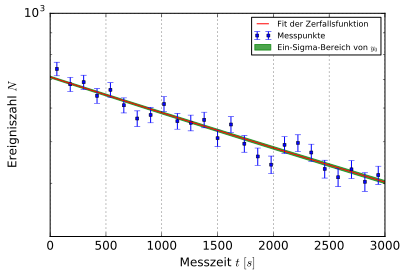

## Ohne $\Delta y_0$

$A$,$654.43 \pm 13.08$
$\lambda$,$0.000211 \pm 0.000012$
$\tau$,$4740.71 \pm 276.61$
$T_{{1/2}}$,$3286.01 \pm 191.73$
$\chi^2$,$23.188$
$\chi^2_{red}$,$1.054$


## $+\Delta y_0$

$A$,$657.66 \pm 13.06$
$\lambda$,$0.000209 \pm 0.000012$
$\tau$,$4774.88 \pm 278.62$
$T_{{1/2}}$,$3309.69 \pm 193.13$
$\chi^2$,$23.198$
$\chi^2_{red}$,$1.054$


## $-\Delta y_0$

$A$,$651.19 \pm 13.09$
$\lambda$,$0.000212 \pm 0.000012$
$\tau$,$4706.54 \pm 274.60$
$T_{{1/2}}$,$3262.32 \pm 190.34$
$\chi^2$,$23.177$
$\chi^2_{red}$,$1.054$


## Lebensdauer und Halbwertszeit mit quadratisch addierten Fehlern

$\tau$,$4740.71 \pm 278.71$
$T_{{1/2}}$,$3286.01 \pm 193.19$


In [36]:
exp1 = []
popt = [0,0,0]
pcov = [0,0,0]
tau = []
dtau = []
chisq = []

for i in range(-1,2):
    exp1.append(lambda t, A, l: 12*(y0 + i*dy0) + A*exp(-l*t))
    popt[i+1], pcov[i+1] = curve_fit(exp1[i+1], dataIn.iloc[1:,0], dataIn.iloc[1:,1],
                                     sigma=dataIn.iloc[1:,2].values, p0=(400, 3e-3))
    tau.append(1/popt[i+1][1])
    dtau.append(tau[i+1]*tau[i+1]*sqrt(pcov[i+1][1][1]))
    
    chisq.append(chi2(dataIn.iloc[1:,1], exp1[i+1](dataIn.iloc[1:,0], *(popt[i+1])), dataIn.iloc[1:,2].values))
                
figure()
errorbar(dataIn.iloc[:,0], dataIn.iloc[:,1], yerr=dataIn.iloc[:,2].values, fmt='bs', label='Messpunkte')
plot(linspace(0,3000,1000), exp1[1](linspace(0,3000,1000), *(popt[1])), 'r-', label='Fit der Zerfallsfunktion')
fill_between(linspace(0,3000,1000), exp1[2](linspace(0,3000,1000), *(popt[2])), exp1[0](linspace(0,3000,1000), *(popt[0])),
             color='g', alpha=0.7)
xlabel('Messzeit $t \ [s]$')
ylabel('Ereigniszahl $N$')
handles, labels = gca().get_legend_handles_labels()
p = Rectangle((0, 0), 1, 1, color='g', alpha=0.7)
handles.append(p)
labels.append('Ein-Sigma-Bereich von $y_0$')
legend(handles, labels, fontsize=8)
grid()
yscale('log')
ylim((3e+2, 10**3))
show()

f = 22

display(Markdown("## Ohne $\Delta y_0$"))
display_valtable([
        ("$A$", "${0:.2f} \pm {1:.2f}$".format(popt[1][0], sqrt(pcov[1][0][0]))),
        ("$\lambda$", "${0:.6f} \pm {1:.6f}$".format(popt[1][1], sqrt(pcov[1][1][1]))),
        (r"$\tau$", "${0:.2f} \pm {1:.2f}$".format(tau[1], dtau[1])),
        (r"$T_{{1/2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1], log(2)*dtau[1])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[1])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[1]/f))
    ])

display(Markdown("## $+\Delta y_0$"))
display_valtable([
        ("$A$", "${0:.2f} \pm {1:.2f}$".format(popt[0][0], sqrt(pcov[0][0][0]))),
        ("$\lambda$", "${0:.6f} \pm {1:.6f}$".format(popt[0][1], sqrt(pcov[0][1][1]))),
        (r"$\tau$", "${0:.2f} \pm {1:.2f}$".format(tau[0], dtau[0])),
        (r"$T_{{1/2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[0], log(2)*dtau[0])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[0])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[0]/f))
    ])

display(Markdown("## $-\Delta y_0$"))
display_valtable([
        ("$A$", "${0:.2f} \pm {1:.2f}$".format(popt[2][0], sqrt(pcov[2][0][0]))),
        ("$\lambda$", "${0:.6f} \pm {1:.6f}$".format(popt[2][1], sqrt(pcov[2][1][1]))),
        (r"$\tau$", "${0:.2f} \pm {1:.2f}$".format(tau[2], dtau[2])),
        (r"$T_{{1/2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[2], log(2)*dtau[2])),
        (r"$\chi^2$", "${:.3f}$".format(chisq[2])),
        (r"$\chi^2_{red}$", "${:.3f}$".format(chisq[2]/f))
    ])

display(Markdown("## Lebensdauer und Halbwertszeit mit quadratisch addierten Fehlern"))
dtau[1] = sqrt(dtau[1]**2 + mean([abs(tau[1]-tau[0]), abs(tau[1]-tau[2])])**2)
display_valtable([
        (r"$\tau$", "${0:.2f} \pm {1:.2f}$".format(tau[1], dtau[1])),
        (r"$T_{{1/2}}$", "${0:.2f} \pm {1:.2f}$".format(log(2)*tau[1], log(2)*dtau[1])),
    ])